<a href="https://colab.research.google.com/github/paulovictorcorreia/rn_enem_data_analysis/blob/master/RN_DATA_ANALYSIS_ENEM_2017_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
This is an cleaner and updated version of the notebook used in my graduation final project at UFRN, with improved analysis, and also more organized than the  one used on the project, altough variables will remain with their names in portuguese to facilitate workflow of this project.

It is important to notice, that this notebook uses the same dataset as the previous one, which is the results of the High School National Exam in 2017(Enem 2017), and on future works it is planned to use more educational datasets of the Rio Grande do Norte State. Nonetheless, every step of this work will be detailed and separated in different sections.

The *Exame Nacional do Ensino Médio* (Enem), or High School National Exam, is a test that happens every year in Brazil since late 1990's, and it was created first to analyse the peformance of high schools, evaluating the knowledge of different areas, such as science, mathematics, portuguese, history, geography and writing a essay. Later on the 2000's, government changed the test, making a 180 question mark plus writing an essay, and created the Sisu and Fies, systems in which students could use their grade in the exam to enter public and private universities. Nowadays, Enem is the most accessible way to access higher education, and, because of this, a way to increase social mobility in all classes of our society. Nonetheless, studying the peformance and the profile of the students in each state of Brazil that attended to the test is crutial to improve public politics towards improving education.

In this kernel, we will study the profile of the students of Rio Grande do Norte in following way: we will import a dataset who was already filtered to have only residents of Rio Grande do Norte in 2017, then we will filter the dataset in order to use only non redundant characteristics of the candidate. Then we will have a dataset with this info that will be used to EDA. Than, we will drop all rows with NaN values and use this new dataset to peform a predictive model of the peformance of the student, in order to analyse the most relevant characteristics tha influenced on the peformance. 

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
!ls

# 2 Importing and Cleaning the Data

Now we're going to download libraries to peform analysis, import the dataframe, clean it, improving memory usage and algorithm appliance perfomance.

In between the data cleaning, we may gain some insights and characteristics of the data, by plotting graphics and other EDA on DATA we are going to drop. On the next section, we will make a more meaningful EDA on the dataset to gain more insights.



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

enem2017 = pd.read_csv("My Drive/rn_enem_data_analysis/data/enem_rn_2017.csv", sep=';', encoding='ISO-8859-1',index_col='NU_INSCRICAO')
#enem2017['SG_UF_RESIDENCIA'] = enem2017[enem2017['SG_UF_RESIDENCIA'] == 'RN']
#print(enem2017.info(verbose=True, max_cols=10))
print(enem2017.head())
print(enem2017.shape)
print(enem2017.info())

              Unnamed: 0  Unnamed: 0.1  NU_ANO  ...  Q025 Q026  Q027
NU_INSCRICAO                                    ...                 
170003127880           0            32    2017  ...     A    C     A
170006483595           1            33    2017  ...     A    A     B
170003127896           2            65    2017  ...     B    A     D
170001415750           3            73    2017  ...     B    A     D
170001417217           4           169    2017  ...     A    A     A

[5 rows x 138 columns]
(159076, 138)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159076 entries, 170003127880 to 170002977975
Columns: 138 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(64), object(43)
memory usage: 168.7+ MB
None


As it is possible to see, there are in total **139 columns** in total to analyze. Although it is seen as good to have a lot of features to use in models, most of this columns are categorical or are redundant. Because of this, we selected all non redundant columns that can give us different info, like family income, sex, request for special care due to a condition of the candidate, the grades of all subjects, etc.

In [0]:
selectedCols = [
    'NO_MUNICIPIO_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'CO_ESCOLA',
    'CO_MUNICIPIO_ESC',
    'CO_MUNICIPIO_PROVA',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    'Q008',
    'Q009',
    'Q010',
    'Q011',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q024',
    'Q025',
    'Q026',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_SURDO_CEGUEIRA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_MENTAL',
    'IN_DEFICIT_ATENCAO',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_AUTISMO',
    'IN_VISAO_MONOCULAR',
    'IN_OUTRA_DEF',
    'IN_GESTANTE',
    'IN_LACTANTE',
    'IN_IDOSO',
    'IN_ESTUDA_CLASSE_HOSPITALAR',
    'IN_SEM_RECURSO',
    'IN_BRAILLE',
    'IN_AMPLIADA_24',
    'IN_AMPLIADA_18',
    'IN_LEDOR',
    'IN_ACESSO',
    'IN_TRANSCRICAO',
    'IN_LIBRAS',
    'IN_LEITURA_LABIAL',
    'IN_MESA_CADEIRA_RODAS',
    'IN_MESA_CADEIRA_SEPARADA',
    'IN_APOIO_PERNA',
    'IN_GUIA_INTERPRETE',
    'IN_COMPUTADOR',
    'IN_CADEIRA_ESPECIAL',
    'IN_CADEIRA_CANHOTO',
    'IN_CADEIRA_ACOLCHOADA',
    'IN_PROVA_DEITADO',
    'IN_MOBILIARIO_OBESO',
    'IN_LAMINA_OVERLAY',
    'IN_PROTETOR_AURICULAR',
    'IN_MEDIDOR_GLICOSE',
    'IN_MAQUINA_BRAILE',
    'IN_SOROBAN',
    'IN_MARCA_PASSO',
    'IN_SONDA',
    'IN_MEDICAMENTOS',
    'IN_SALA_INDIVIDUAL',
    'IN_SALA_ESPECIAL',
    'IN_SALA_ACOMPANHANTE',
    'IN_MOBILIARIO_ESPECIFICO',
    'IN_MATERIAL_ESPECIFICO',
    'IN_NOME_SOCIAL',

]
results = enem2017[selectedCols].copy()
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159076 entries, 170003127880 to 170002977975
Data columns (total 98 columns):
NO_MUNICIPIO_RESIDENCIA        159076 non-null object
SG_UF_RESIDENCIA               159076 non-null object
NU_IDADE                       159075 non-null float64
TP_SEXO                        159076 non-null object
TP_ESTADO_CIVIL                151279 non-null float64
TP_COR_RACA                    159076 non-null int64
TP_NACIONALIDADE               159076 non-null int64
TP_ST_CONCLUSAO                159076 non-null int64
CO_ESCOLA                      28259 non-null float64
CO_MUNICIPIO_ESC               28259 non-null float64
CO_MUNICIPIO_PROVA             159076 non-null int64
TP_DEPENDENCIA_ADM_ESC         28259 non-null float64
TP_LOCALIZACAO_ESC             28259 non-null float64
TP_SIT_FUNC_ESC                28200 non-null float64
TP_ANO_CONCLUIU                159076 non-null int64
TP_ESCOLA                      159076 non-null int64
TP_ENSINO   

This dataframe *results* will be used on a EDA to gain insights over the data. But before, let's check the health of our dataset.

<Figure size 1440x1440 with 0 Axes>

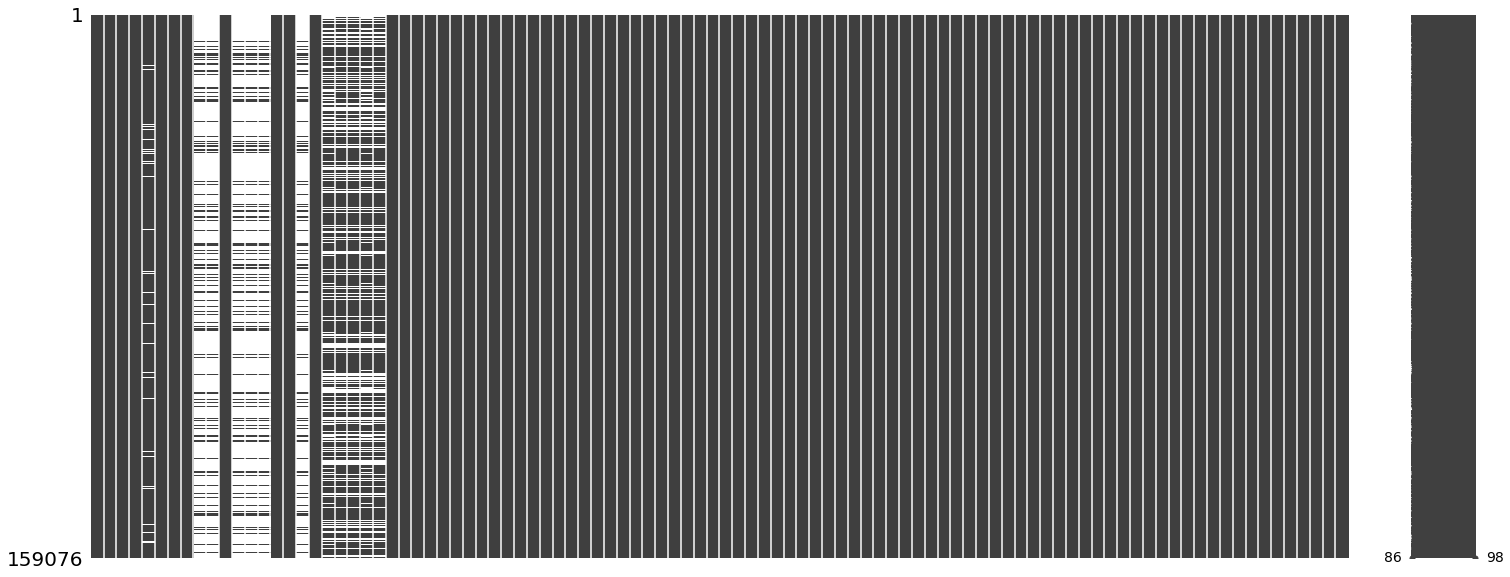

In [0]:
import missingno as msno
%matplotlib inline
plt.figure(figsize=(20, 20))
msno.matrix(results)
plt.show()

We used *missingno* to see data integrity. The black parts of this plot represents non-missing data, and the white parts are missing data of the dataset. As we can see, the first 40 columns approximately have missing data only, and up until the 98th column there are no missing data. So now, let's check the first 40 columns of the dataset to check for the characteristics that have missing values:

<Figure size 1440x1440 with 0 Axes>

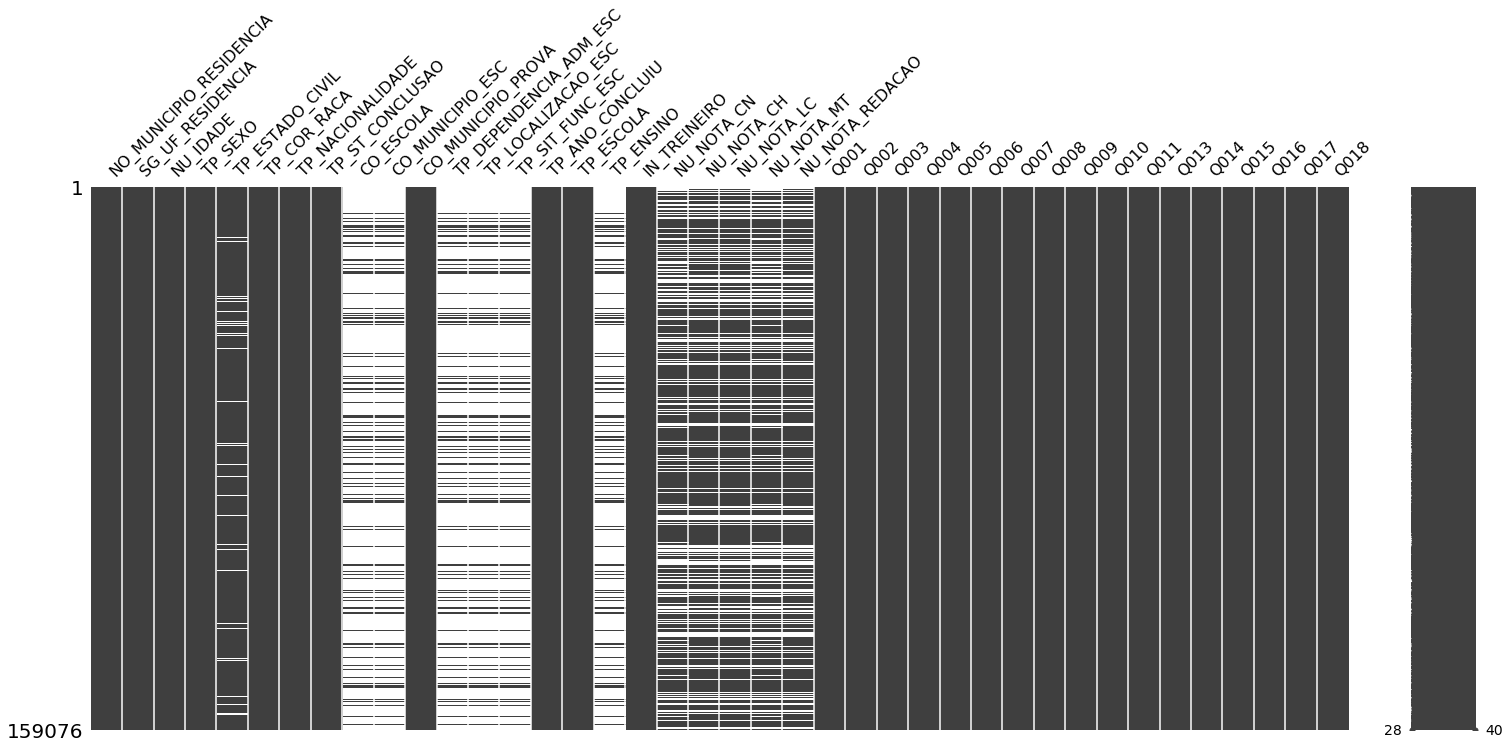

In [0]:
plt.figure(figsize=(20, 20))
msno.matrix(results.iloc[:, :40])
plt.show()

In [0]:
#results.dropna(subset=['TP_ENSINO', 'TP_SIT_FUNC_ESC','TP_LOCALIZACAO_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'CO_MUNICIPIO_ESC', 'CO_ESCOLA', 'TP_ESTADO_CIVIL'], inplace=True)
#results.drop(columns=['TP_ESTADO_CIVIL', 'Q010'], inplace=True)
results.isnull().sum()/results.shape[0]

NO_MUNICIPIO_RESIDENCIA     0.000000
SG_UF_RESIDENCIA            0.000000
NU_IDADE                    0.000006
TP_SEXO                     0.000000
TP_ESTADO_CIVIL             0.049014
                              ...   
IN_SALA_ESPECIAL            0.000000
IN_SALA_ACOMPANHANTE        0.000000
IN_MOBILIARIO_ESPECIFICO    0.000000
IN_MATERIAL_ESPECIFICO      0.000000
IN_NOME_SOCIAL              0.000000
Length: 98, dtype: float64

As we can see, there is about 5 columns with approximately 82% of missing data, and those columns are: CO_ESCOLA, CO_MUNICIPIO_ESC, TP_LOCALIZACAO_ESCOLA, TP_SIT_FUNC_ESCOLA, TP_DEPENDENCIA_ADM_ESC, TP_ENSINO. Those columns are very likely to get dropped, but before, dropping, let's analyse these columns to see if there is anything we could be missing in the analysis.

In [0]:
results.iloc[:, :40].head(15)

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,Janduís,RN,17.0,F,0.0,3,1,3,NaN,NaN,2409308,NaN,NaN,NaN,0,1,NaN,1,440.8,489.5,492.5,438.6,520.0,H,H,A,A,3.0,B,A,B,C,A,A,A,A,A,A,A,A
170006483595,João Câmara,RN,22.0,F,0.0,1,1,1,NaN,NaN,2405801,NaN,NaN,NaN,4,1,NaN,0,549.9,529.3,510.1,526.7,740.0,D,C,B,D,3.0,B,A,B,C,A,A,A,A,A,A,A,A
170003127896,Parnamirim,RN,28.0,F,0.0,2,1,1,NaN,NaN,2408102,NaN,NaN,NaN,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,F,E,D,F,4.0,H,A,D,D,C,A,A,A,A,B,A,A
170001415750,Açu,RN,26.0,F,0.0,1,1,1,NaN,NaN,2400208,NaN,NaN,NaN,8,1,NaN,0,406.0,608.0,566.6,450.3,560.0,B,C,A,B,2.0,B,A,B,C,A,A,A,A,A,A,A,A
170001417217,Natal,RN,39.0,M,2.0,3,1,1,NaN,NaN,2408102,NaN,NaN,NaN,11,1,NaN,0,495.5,578.5,544.5,689.7,640.0,D,E,C,D,2.0,F,A,B,D,B,A,A,B,A,B,A,B
170003130725,Jardim de Piranhas,RN,25.0,F,0.0,3,1,1,NaN,NaN,2405603,NaN,NaN,NaN,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5.0,D,A,B,B,A,B,A,A,A,A,A,A
170003130723,Areia Branca,RN,44.0,M,1.0,3,1,1,NaN,NaN,2401107,NaN,NaN,NaN,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,B,B,B,A,3.0,B,A,B,B,B,A,A,A,A,A,A,A
170001432396,Natal,RN,35.0,M,0.0,0,1,1,NaN,NaN,2408102,NaN,NaN,NaN,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,B,G,D,D,7.0,H,A,B,C,B,A,A,B,B,B,A,A
170006486473,Pau dos Ferros,RN,21.0,M,0.0,3,1,1,NaN,NaN,2409407,NaN,NaN,NaN,2,1,NaN,0,483.2,428.6,434.4,465.3,400.0,D,G,A,D,3.0,E,A,B,C,B,A,A,A,A,B,A,A


Now we are going to EDA thosse columns that are going to be dropped due to the high number of missing values, since we are going to use a predictive model to analyse features importances.

Tipo de dependencia administrativa: 
159076
Tipo de escola: 
159076, 


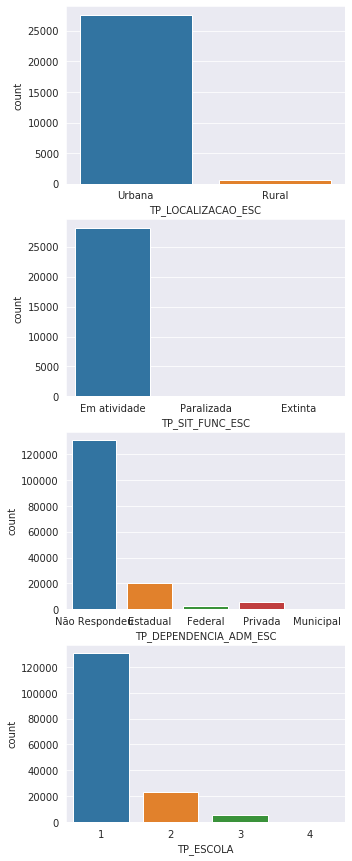

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

fig, ax = plt.subplots(4, 1)
fig.set_figheight(15)
fig.set_figwidth(5)

variables_drop_df = results.copy()
variables_drop_df['TP_LOCALIZACAO_ESC'] = variables_drop_df['TP_LOCALIZACAO_ESC'].replace({1.0: "Urbana", 2.0:"Rural"})
variables_drop_df['TP_SIT_FUNC_ESC'] = variables_drop_df['TP_SIT_FUNC_ESC'].replace({1.0:"Em atividade", 2.0:"Paralizada", 3.0:"Extinta"})
variables_drop_df['TP_DEPENDENCIA_ADM_ESC'] = variables_drop_df['TP_DEPENDENCIA_ADM_ESC'].replace({1.0:"Federal", 2.0:"Estadual", 3.0:"Municipal", 4.0:"Privada"})
variables_drop_df['TP_DEPENDENCIA_ADM_ESC'].fillna("Não Respondeu", inplace=True)
print(f"Tipo de dependencia administrativa: \n{variables_drop_df['TP_DEPENDENCIA_ADM_ESC'].value_counts(ascending=False).sum()}")
print(f"Tipo de escola: \n{variables_drop_df['TP_ESCOLA'].value_counts(ascending=False).sum()}, ")

sns.countplot(x='TP_LOCALIZACAO_ESC', data=variables_drop_df, ax=ax[0])
sns.countplot(x='TP_SIT_FUNC_ESC', data=variables_drop_df, ax=ax[1])
sns.countplot(x='TP_DEPENDENCIA_ADM_ESC', data=variables_drop_df, ax=ax[2])
sns.countplot(x="TP_ESCOLA", data=variables_drop_df, ax=ax[3])
plt.show()

In [0]:
dropCol = [
           'TP_LOCALIZACAO_ESC',
           'TP_SIT_FUNC_ESC',
           'TP_ENSINO',
           'CO_ESCOLA',
           'CO_MUNICIPIO_ESC'
]
print('Localização: ', results.TP_LOCALIZACAO_ESC.unique())
print('Sit_func: ', results.TP_SIT_FUNC_ESC.unique())
print('Tp_depend: ', results.TP_DEPENDENCIA_ADM_ESC.unique())
print('tp_ensino: ', results.TP_ENSINO.unique())

Localização:  [nan  1.  2.]
Sit_func:  [nan  1.  2.  3.]
Tp_depend:  [nan  2.  1.  4.  3.]
tp_ensino:  [nan  1.  3.  2.]


Unfortunately, we cannot determine wether or not the Enem's subscrition system fills the nan values with a valid response nor have the possibility to impute data with 82% of missing data. So we will just drop these columns to maintain the data integrity.

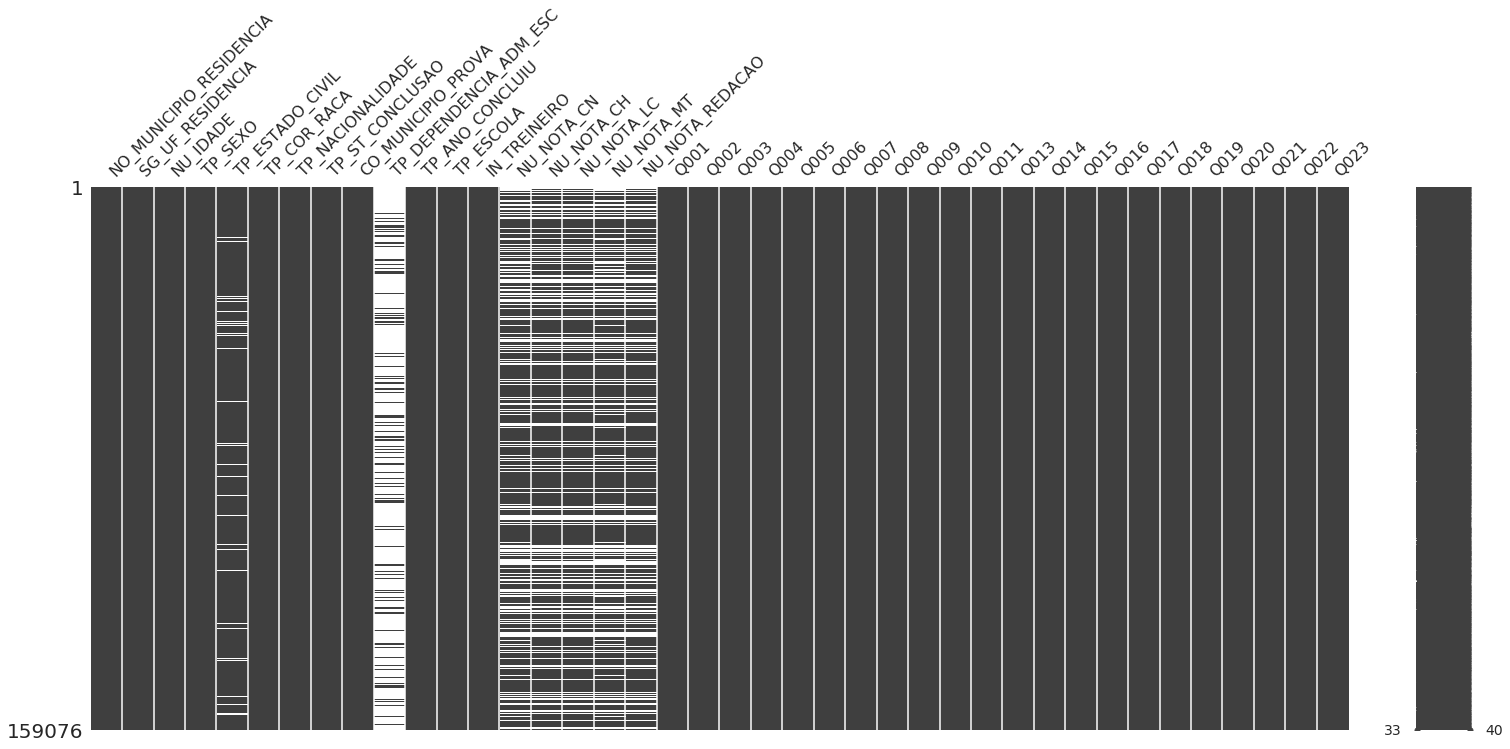

In [0]:
results_dropped = results.drop(labels=dropCol, axis=1)
msno.matrix(results_dropped.iloc[:, :40])

## 2.1 How to deal with the rest of the missing data?
Now, there are only about 6 columns with missing values: the target columns, hence the grades in each of the tests(Natural Science, Mathematics, Human Science, Portuguese, Essay) and the maritial status. Let's check the percentage of missing values in these columns.

In [0]:
missing_cols = ['NU_IDADE'
                'TP_ESTADO_CIVIL',
                'NU_NOTA_CN',
                'NU_NOTA_CH',
                'NU_NOTA_LC',
                'NU_NOTA_MT',
                'NU_NOTA_REDACAO'
]
filter_has_nan_columns = results_dropped.isnull().sum() > 0
results_dropped[filter_has_nan_columns[filter_has_nan_columns].index].isnull().sum()/results_dropped.shape[0] 

NU_IDADE                  0.000006
TP_ESTADO_CIVIL           0.049014
TP_DEPENDENCIA_ADM_ESC    0.822355
NU_NOTA_CN                0.311034
NU_NOTA_CH                0.275409
NU_NOTA_LC                0.275409
NU_NOTA_MT                0.311034
NU_NOTA_REDACAO           0.275409
dtype: float64

### 2.1.1 Maritial Status
There is about 5% of missing data on maritial status, so we have 2 reasonable options: impute the values with the mode of the column or just drop the column. Let's check the mode of the variable first.

In [0]:
print(results_dropped.TP_ESTADO_CIVIL.value_counts( normalize=False))
print(results_dropped.TP_ESTADO_CIVIL.isnull().sum())



0.0    128368
1.0     20118
2.0      2549
3.0       244
Name: TP_ESTADO_CIVIL, dtype: int64
7797


As we can see, according to the dictionary of the data on the Introduction, it's possible to see that the majority of the candidates are single, 128368 of them, and there is 7797 missing values on this columns, corresponding to 5% of the total rows.

Since the data is already biased towards single candidates and it's lessa then 5% of the data, it's *OK* to impute thes values with the mode of the variable. Ideally, bayesian approach of imputing could be used, but since we have only 5% of missing data in this column, we can just impute the way we're going to.

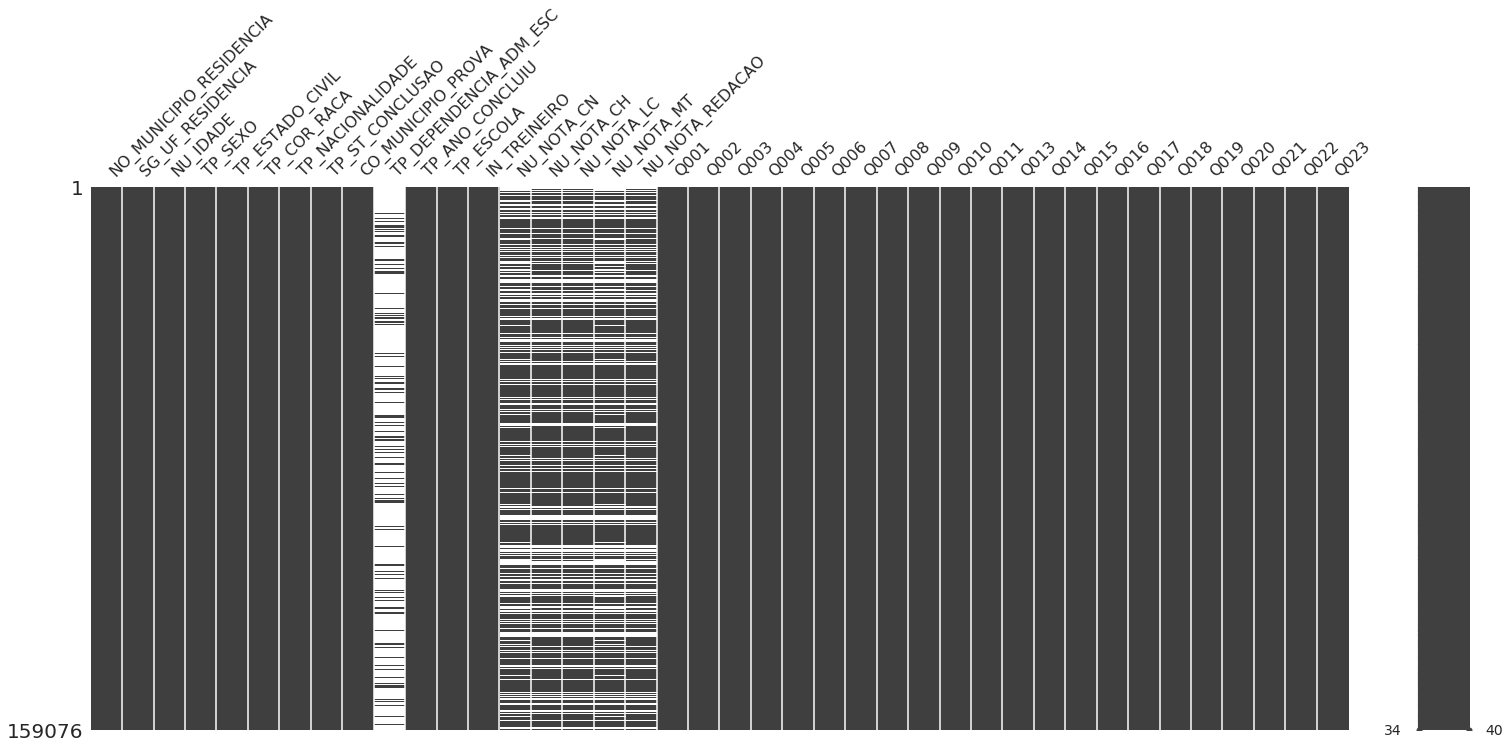

In [0]:
results_imputed = results_dropped.copy()
results_imputed['TP_ESTADO_CIVIL'] = results_imputed['TP_ESTADO_CIVIL'].replace(np.nan, results_imputed['TP_ESTADO_CIVIL'].value_counts().index[0])
msno.matrix(results_imputed.iloc[:, :40])

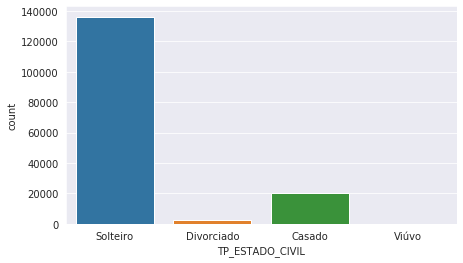

In [0]:
plot_maritial = results_imputed[['TP_ESTADO_CIVIL']].copy()
plot_maritial['TP_ESTADO_CIVIL'] = plot_maritial['TP_ESTADO_CIVIL'].replace({
    0: "Solteiro",
    1: "Casado",
    2: "Divorciado",
    3: "Viúvo"
})
plt.figure(figsize=(7, 4))
sns.countplot(x='TP_ESTADO_CIVIL', data=plot_maritial)

As we can see, most of the candidates are single.

### 2.1.2 NU_IDADE

In this section, we will explore the age of the candidate and drop the *nan* values.

The number of nan rows in the column of age is {1}


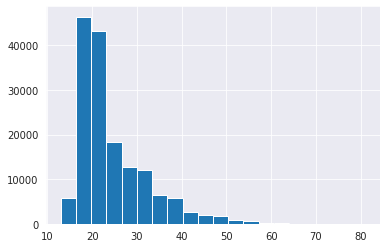

In [0]:
print('The number of nan rows in the column of age is', {results_imputed['NU_IDADE'].isnull().sum()})
results_imputed['NU_IDADE'].hist(bins=20)
plt.show()

The number of nan rows in the column of age is {0}


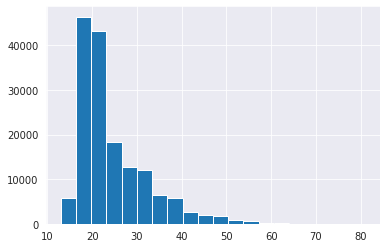

In [0]:
results_imputed.dropna(subset=['NU_IDADE'], inplace=True)
print('The number of nan rows in the column of age is', {results_imputed['NU_IDADE'].isnull().sum()})
results_imputed['NU_IDADE'].hist(bins=20)

As we can see, the distribution of age is left-skewed, meaning that there are more young candidates around 17 and 22 years old than older candidates. 

### 2.1.3 Target Columns

The next step is how we will treat the missing values in the target columns, which are the grades in each one of the subjects of the exam. It is important to notice that the missing values on *NU_NOTA_CH, NU_NOTA_LC* and *NU_NOTA_REDACAO* are the same, and also for *NU_NOTA_CN* and *NU_NOTA_MT* set. The raeson for this is that on this year, they first three subjects happened on the same day and the other two on another day, that's why we have the samme quantity of missing values on these columns, as we can see:

In [0]:
print('Missing values for the first day of the exam: ')
print(results_imputed[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].isnull().sum()/results_imputed.shape[0])
print()
print('Missing values of the second day of test: ')
print(results_imputed[['NU_NOTA_CN', 'NU_NOTA_MT']].isnull().sum()/results_imputed.shape[0])

Missing values for the first day of the exam: 
NU_NOTA_CH         0.275411
NU_NOTA_LC         0.275411
NU_NOTA_REDACAO    0.275411
dtype: float64

Missing values of the second day of test: 
NU_NOTA_CN    0.311036
NU_NOTA_MT    0.311036
dtype: float64


There is about 27.5% of missing data for the first day of the exam and 31.1% on the second. This means that those candidates were either eliminated in the middle of the exam or missed the test.

One of the ways that we could impute these values, which could be a more realistic approach would be to use the mean of the candidate's school or school administrative unity. Unfortunately, we don't have these columns on our dataset anymore, and we could bias our database if we imputed with the mean of the whole dataset or with the columns we have, since we have about 30% of missing data from this columns. So we will just drop these rows because we would still have approximately ~70% of our dataframe integrity.

In [0]:
results_imputed["TP_DEPENDENCIA_ADM_ESC"] = results_imputed["TP_DEPENDENCIA_ADM_ESC"].fillna(-5)
results_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159075 entries, 170003127880 to 170002977975
Data columns (total 93 columns):
NO_MUNICIPIO_RESIDENCIA        159075 non-null object
SG_UF_RESIDENCIA               159075 non-null object
NU_IDADE                       159075 non-null float64
TP_SEXO                        159075 non-null object
TP_ESTADO_CIVIL                159075 non-null float64
TP_COR_RACA                    159075 non-null int64
TP_NACIONALIDADE               159075 non-null int64
TP_ST_CONCLUSAO                159075 non-null int64
CO_MUNICIPIO_PROVA             159075 non-null int64
TP_DEPENDENCIA_ADM_ESC         159075 non-null float64
TP_ANO_CONCLUIU                159075 non-null int64
TP_ESCOLA                      159075 non-null int64
IN_TREINEIRO                   159075 non-null int64
NU_NOTA_CN                     109597 non-null float64
NU_NOTA_CH                     115264 non-null float64
NU_NOTA_LC                     115264 non-null float64
NU_NOTA_M

In [0]:
results_dropped = results_imputed.dropna()
results_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 93 columns):
NO_MUNICIPIO_RESIDENCIA        109399 non-null object
SG_UF_RESIDENCIA               109399 non-null object
NU_IDADE                       109399 non-null float64
TP_SEXO                        109399 non-null object
TP_ESTADO_CIVIL                109399 non-null float64
TP_COR_RACA                    109399 non-null int64
TP_NACIONALIDADE               109399 non-null int64
TP_ST_CONCLUSAO                109399 non-null int64
CO_MUNICIPIO_PROVA             109399 non-null int64
TP_DEPENDENCIA_ADM_ESC         109399 non-null float64
TP_ANO_CONCLUIU                109399 non-null int64
TP_ESCOLA                      109399 non-null int64
IN_TREINEIRO                   109399 non-null int64
NU_NOTA_CN                     109399 non-null float64
NU_NOTA_CH                     109399 non-null float64
NU_NOTA_LC                     109399 non-null float64
NU_NOTA_M

We remained with 100k+ of rows with non missing values.  

## 2.2 Analysing column content

In our analysis, all input data we will use in predictive models are categorical. Therefore, each column can assume a limited number of values, and if there are only one value on the column we can drop this column, because it won't give many information to use on predictive model.

In [0]:
colToDrop = []
for col in results_dropped.columns.to_list():
  if len(results_dropped[col].unique()) == 1:
    colToDrop.append(col)
print(colToDrop)

['SG_UF_RESIDENCIA', 'IN_SURDO_CEGUEIRA', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_PROVA_DEITADO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MATERIAL_ESPECIFICO']


These columns have only one value in our database, even though the dictionary says it can assume more than one value. For this reason, in our analysis, we will drop these columns.

But before we drop them, we will see the values in each one of them.

In [0]:
print(len(colToDrop))

for var in colToDrop:
  print(var, ': ', results_dropped[var].unique())

13
SG_UF_RESIDENCIA :  ['RN']
IN_SURDO_CEGUEIRA :  [0]
IN_ESTUDA_CLASSE_HOSPITALAR :  [0]
IN_GUIA_INTERPRETE :  [0]
IN_COMPUTADOR :  [0]
IN_CADEIRA_ESPECIAL :  [0]
IN_CADEIRA_CANHOTO :  [0]
IN_PROVA_DEITADO :  [0]
IN_LAMINA_OVERLAY :  [0]
IN_PROTETOR_AURICULAR :  [0]
IN_MARCA_PASSO :  [0]
IN_SONDA :  [0]
IN_MATERIAL_ESPECIFICO :  [0]


There are 13 columns with just one value in them. The first column, which is *SG_UF_RESIDENCIA* is the state in which the candidate lives, and the state chosen was Rio Grande do Norte.

The other columns are meant to be special care to the candidates that asked for. These special cara may come from handicapped candiates, with problems in vison and hearing, left-handed desks, etc.

According to the dictionary. the values in them are 0, which means that on that year no candidates from RN asked for these special cares that the government could give.

In [0]:
results_dropped2 = results_dropped.drop(colToDrop, axis=1)
results_dropped2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 80 columns):
NO_MUNICIPIO_RESIDENCIA     109399 non-null object
NU_IDADE                    109399 non-null float64
TP_SEXO                     109399 non-null object
TP_ESTADO_CIVIL             109399 non-null float64
TP_COR_RACA                 109399 non-null int64
TP_NACIONALIDADE            109399 non-null int64
TP_ST_CONCLUSAO             109399 non-null int64
CO_MUNICIPIO_PROVA          109399 non-null int64
TP_DEPENDENCIA_ADM_ESC      109399 non-null float64
TP_ANO_CONCLUIU             109399 non-null int64
TP_ESCOLA                   109399 non-null int64
IN_TREINEIRO                109399 non-null int64
NU_NOTA_CN                  109399 non-null float64
NU_NOTA_CH                  109399 non-null float64
NU_NOTA_LC                  109399 non-null float64
NU_NOTA_MT                  109399 non-null float64
NU_NOTA_REDACAO             109399 non-null float64
Q001

## 2.3 Changing column types and values for continuos analysis

We have now selected all the columns that we will work with in the analysis for this notebook. Altough, we still have to fix its types in order to use in a machine learning model.

As we can see from previous output, there are a lot of categorical data as object type. In order to use *sklearn's* tools, for the purpose of this work, we have to convert object types into int64 types and so on.

For high cardinality columns, such as the city of the candidate, we are going to use target encoding, in order to reduce cardinality and transform the variables into numerical features, and use them on our predictive models aside from the MCA analysis, which we will separate the candidates by the 4 regions of the state of Rio Grande do Norte.

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
object_types = results_dropped2.select_dtypes("object")
object_types = object_types.drop('NO_MUNICIPIO_RESIDENCIA', axis=1)
print(object_types.columns)

for col in object_types.columns.to_list():
  object_types[col] = le.fit_transform(object_types[col])
print(object_types.head())

Index(['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008',
       'Q009', 'Q010', 'Q011', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026'],
      dtype='object')
              TP_SEXO  Q001  Q002  Q003  Q004  ...  Q022  Q023  Q024  Q025  Q026
NU_INSCRICAO                                   ...                              
170003127880        0     7     7     0     0  ...     1     0     0     0     2
170006483595        0     3     2     1     3  ...     1     0     0     0     0
170001415750        0     1     2     0     1  ...     2     0     0     1     0
170001417217        1     3     4     2     3  ...     2     0     1     0     0
170006486473        1     3     6     0     3  ...     1     0     1     1     0

[5 rows x 25 columns]


We just label encoded variables that are considered object, and by checking the variables' dictionary, these variables have a certain order, meaning that the higher the value, the "greater" the value of the variable is, due to the fact that most of these variables that begin with "Q" quantifies something. Later, all these steps of preprocessing are going to be on a pipeline.

Now, to futher prepare the data, we will just concatenate the transformed data into a single dataframe.

In [0]:
float_types = results_dropped2.select_dtypes('float64')
int_types = results_dropped2.select_dtypes('int64')


df_adjusted = pd.concat([object_types, float_types, int_types], axis=1)
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 79 columns):
TP_SEXO                     109399 non-null int64
Q001                        109399 non-null int64
Q002                        109399 non-null int64
Q003                        109399 non-null int64
Q004                        109399 non-null int64
Q006                        109399 non-null int64
Q007                        109399 non-null int64
Q008                        109399 non-null int64
Q009                        109399 non-null int64
Q010                        109399 non-null int64
Q011                        109399 non-null int64
Q013                        109399 non-null int64
Q014                        109399 non-null int64
Q015                        109399 non-null int64
Q016                        109399 non-null int64
Q017                        109399 non-null int64
Q018                        109399 non-null int64
Q019                  

The variables with "IN" prefix are binary categorical variables, so theres no further preparation on these columns.

Q005 is the number of people that lives in the house of the candidate, counting from 1 up to 20.

The columns with the "TP" prefix are the ones we are going to preprocess.

In [0]:
adjusting_TP_df = df_adjusted[['TP_ANO_CONCLUIU', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESTADO_CIVIL', 'TP_SEXO', 'TP_ESCOLA', 'TP_ST_CONCLUSAO']].copy()
set(adjusting_TP_df.TP_ESCOLA)

{1, 2, 3, 4}

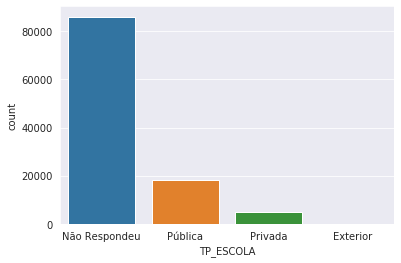

In [0]:
df_adjusted['TP_ESCOLA'] = df_adjusted['TP_ESCOLA'].replace({
    1: "Não Respondeu",
    2: "Pública",
    3: "Privada",
    4: "Exterior"
})

sns.countplot(x='TP_ESCOLA', data=df_adjusted)

As we can see, the majority of the candidates did not answer in which type of school they have studied, later, we will create a subsection in order to understand the reasons to why they did not answer: it could be because of the age of the candidates, and also because they did finish high school a long time ago. For now, we will keep the data cleaning.



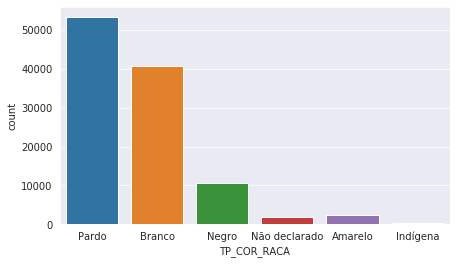

In [0]:
df_adjusted['TP_COR_RACA'] = df_adjusted['TP_COR_RACA'].replace({
    0: "Não declarado",
    1: "Branco",
    2: "Negro",
    3: "Pardo",
    4: "Amarelo",
    5: "Indígena"
})
plt.figure(figsize=(7, 4))
sns.countplot(x='TP_COR_RACA', data=df_adjusted)

In this plot, we can see that most of the candidates have declared themselves as brown, and it could change depending on the state of Brazil, but let's focus on Rio Grande do Norte.

Following the graph, white people are the second most declared skin color of candidates, with 40k people, followed by black people with about 10k. Not declared, yellow and native people have far less than 10k candidates that have declared.

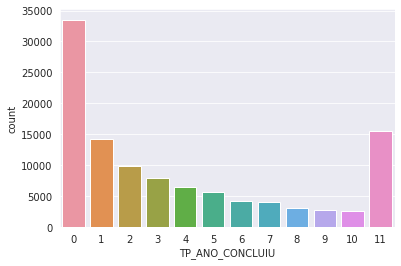

In [0]:
sns.countplot(x='TP_ANO_CONCLUIU', data=df_adjusted)
#adjusting_TP_df['TP_ANO_CONCLUIU'].hist(bins=12)

As we can see, most of the candidates did not declared when they've finished school, and candidates with at least one year that have finished school are on second place in count numbers, up to candidates that have finished school 11+ years before 2017.

In [0]:
# here we are going to export as a csv the dataframe that later will be used on 
#the MCA and t-SNE analysis. More cleaning will be done when we begin analysing
# this
export_df = pd.concat([results_dropped2[['NO_MUNICIPIO_RESIDENCIA']], df_adjusted], axis=1)

#export_df.to_csv("My Drive/rn_enem_data_analysis/data/unsupervised_enem2017.csv")
export_df

,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,NU_IDADE,TP_ESTADO_CIVIL,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_MUNICIPIO_PROVA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_CADEIRA_ACOLCHOADA,IN_MOBILIARIO_OBESO,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_NOME_SOCIAL
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,Janduís,0,7,7,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,17.0,0.0,-5.0,440.8,489.5,492.5,438.6,520.0,3.0,Pardo,1,3,2409308,0,Não Respondeu,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006483595,João Câmara,0,3,2,1,3,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,22.0,0.0,-5.0,549.9,529.3,510.1,526.7,740.0,3.0,Branco,1,1,2405801,4,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170001415750,Açu,0,1,2,0,1,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,26.0,0.0,-5.0,406.0,608.0,566.6,450.3,560.0,2.0,Branco,1,1,2400208,8,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170001417217,Natal,1,3,4,2,3,5,0,1,3,1,0,0,1,0,1,0,1,1,1,0,2,0,1,0,0,39.0,2.0,-5.0,495.5,578.5,544.5,689.7,640.0,2.0,Pardo,1,1,2408102,11,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006486473,Pau dos Ferros,1,3,6,0,3,4,0,1,2,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,21.0,0.0,-5.0,483.2,428.6,434.4,465.3,400.0,3.0,Pardo,1,1,2409407,2,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170002969039,Angicos,1,1,1,0,1,1,0,1,2,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,32.0,1.0,-5.0,495.0,484.7,464.7,394.3,300.0,2.0,Pardo,1,1,2400802,11,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170004630237,Parnamirim,0,3,3,2,3,2,0,1,3,1,0,0,1,0,1,0,0,1,1,0,2,0,0,1,3,19.0,0.0,-5.0,537.3,393.1,430.5,435.2,480.0,3.0,Pardo,1,4,2403251,0,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006332195,Natal,0,5,4,2,2,4,0,1,2,1,0,0,1,0,1,0,0,1,0,1,3,1,1,1,0,20.0,0.0,-5.0,623.3,624.3,540.6,645.1,780.0,3.0,Branco,1,1,2408102,2,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.4 Encoding socioeconomic questions
In thes subsection, we will encode the non-ordinal categorical variables from socioeconomic questionary by one hot encoding them and the oders. The only non-ordinal categories in this questionary are Q003, Q004, Q026 and Q027, which doesn't have an order sequence.




In [0]:
export_df['TP_NACIONALIDADE'] = export_df['TP_NACIONALIDADE'].replace({
    0:"Não declarado",
    1:"Brasileiro",
    2:"BR_naturalizado",
    3:"Estrangeiro",
    4:"BR_nascido_ext"
})
export_df['TP_ESTADO_CIVIL'] = export_df['TP_ESTADO_CIVIL'].replace({
    0: "Solteiro",
    1: "Casado",
    2: "Divorciado",
    3: "Viúvo"
})
export_df.head()

,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,NU_IDADE,TP_ESTADO_CIVIL,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_MUNICIPIO_PROVA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_CADEIRA_ACOLCHOADA,IN_MOBILIARIO_OBESO,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_NOME_SOCIAL
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,Janduís,0,7,7,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,17.0,Solteiro,-5.0,440.8,489.5,492.5,438.6,520.0,3.0,Pardo,Brasileiro,3,2409308,0,Não Respondeu,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006483595,João Câmara,0,3,2,1,3,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,22.0,Solteiro,-5.0,549.9,529.3,510.1,526.7,740.0,3.0,Branco,Brasileiro,1,2405801,4,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170001415750,Açu,0,1,2,0,1,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,26.0,Solteiro,-5.0,406.0,608.0,566.6,450.3,560.0,2.0,Branco,Brasileiro,1,2400208,8,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170001417217,Natal,1,3,4,2,3,5,0,1,3,1,0,0,1,0,1,0,1,1,1,0,2,0,1,0,0,39.0,Divorciado,-5.0,495.5,578.5,544.5,689.7,640.0,2.0,Pardo,Brasileiro,1,2408102,11,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006486473,Pau dos Ferros,1,3,6,0,3,4,0,1,2,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,21.0,Solteiro,-5.0,483.2,428.6,434.4,465.3,400.0,3.0,Pardo,Brasileiro,1,2409407,2,Não Respondeu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
profissao_mae = pd.get_dummies(export_df['Q004'], prefix="prof_mae_")
profissao_pai = pd.get_dummies(export_df['Q003'], prefix="prof_pai_")
ensino_medio_concluido = pd.get_dummies(export_df['Q026'], prefix="situ_conc_")
ensino_medio_tipo = pd.get_dummies(export_df['TP_ST_CONCLUSAO'], prefix="tipo_ens_medio_")
cor_raca = pd.get_dummies(export_df["TP_COR_RACA"], prefix="cor_raca_")
nacionalidade = pd.get_dummies(export_df["TP_NACIONALIDADE"], prefix="nacionalidade_")
escola = pd.get_dummies(export_df["TP_ESCOLA"], prefix="tipo_escola")
estado_civil = pd.get_dummies(export_df["TP_ESTADO_CIVIL"], prefix="est_civil_")

export_df.drop(['TP_ESTADO_CIVIL', 'TP_ST_CONCLUSAO', 'Q026', 'Q003', 'Q004', 'CO_MUNICIPIO_PROVA', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA'], axis=1, inplace=True)
ml_results = pd.concat([export_df, profissao_mae,
                        profissao_pai, ensino_medio_concluido,
                        ensino_medio_tipo, cor_raca,
                        nacionalidade, escola], axis=1)
ml_results.isnull().sum()

NO_MUNICIPIO_RESIDENCIA         0
TP_SEXO                         0
Q001                            0
Q002                            0
Q006                            0
                               ..
nacionalidade__Não declarado    0
tipo_escola_Exterior            0
tipo_escola_Não Respondeu       0
tipo_escola_Privada             0
tipo_escola_Pública             0
Length: 106, dtype: int64

## 2.5 Target encoding city column

Now we are going to target encode the city variable,due to the high cardinality of the variable, and transform into a numerical variable.



In [0]:
values_target_df = pd.concat([ml_results, float_types[['NU_NOTA_CN', 'NU_NOTA_CH',
                                                       'NU_NOTA_LC', 'NU_NOTA_MT',
                                                       'NU_NOTA_REDACAO']]], axis=1)
print(values_target_df.columns)
mean_grade_df = values_target_df.groupby('NO_MUNICIPIO_RESIDENCIA')['NU_NOTA_CN'].mean()
mean_grade_df.loc['Pau dos Ferros']

Index(['NO_MUNICIPIO_RESIDENCIA', 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011',
       ...
       'nacionalidade__Não declarado', 'tipo_escola_Exterior',
       'tipo_escola_Não Respondeu', 'tipo_escola_Privada',
       'tipo_escola_Pública', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO'],
      dtype='object', length=111)


NU_NOTA_CN    507.042069
NU_NOTA_CN    507.042069
Name: NU_NOTA_CN, dtype: float64

In [0]:


values_target_df['NO_MUNICIPIO_RESIDENCIA']

NU_INSCRICAO
170003127880             Janduís
170006483595         João Câmara
170001415750                 Açu
170001417217               Natal
170006486473      Pau dos Ferros
                      ...       
170002969039             Angicos
170004630237          Parnamirim
170006332195               Natal
170001280094    Marcelino Vieira
170002977975             Mossoró
Name: NO_MUNICIPIO_RESIDENCIA, Length: 109399, dtype: object

In [0]:
column_change = values_target_df[['NO_MUNICIPIO_RESIDENCIA', 'NU_NOTA_CN']].copy()
cities = values_target_df['NO_MUNICIPIO_RESIDENCIA']
new_cities = []
for i in iter(cities):
  #print(mean_grade_df.loc[i,'NU_NOTA_CN'])
  grade = mean_grade_df.loc[i]
  new_cities.append(grade)
print('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
print(len(new_cities))


aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
109399


In [0]:
cities_values = np.array(new_cities)
ml_results['NO_MUNICIPIO_RESIDENCIA'] = cities_values

ml_results.head()


,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q001,Q002,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_IDADE,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,TP_ANO_CONCLUIU,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_NOME_SOCIAL,prof_mae__0,prof_mae__1,prof_mae__2,prof_mae__3,prof_mae__4,prof_mae__5,prof_pai__0,prof_pai__1,prof_pai__2,prof_pai__3,prof_pai__4,prof_pai__5,situ_conc__0,situ_conc__1,situ_conc__2,situ_conc__3,tipo_ens_medio__1,tipo_ens_medio__2,tipo_ens_medio__3,tipo_ens_medio__4,cor_raca__Amarelo,cor_raca__Branco,cor_raca__Indígena,cor_raca__Negro,cor_raca__Não declarado,cor_raca__Pardo,nacionalidade__BR_nascido_ext,nacionalidade__BR_naturalizado,nacionalidade__Brasileiro,nacionalidade__Estrangeiro,nacionalidade__Não declarado,tipo_escola_Exterior,tipo_escola_Não Respondeu,tipo_escola_Privada,tipo_escola_Pública
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,480.238172,0,7,7,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,17.0,-5.0,440.8,489.5,492.5,438.6,520.0,3.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
170006483595,491.996229,0,3,2,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,22.0,-5.0,549.9,529.3,510.1,526.7,740.0,3.0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
170001415750,492.675049,0,1,2,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,26.0,-5.0,406.0,608.0,566.6,450.3,560.0,2.0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
170001417217,523.340580,1,3,4,5,0,1,3,1,0,0,1,0,1,0,1,1,1,0,2,0,1,0,39.0,-5.0,495.5,578.5,544.5,689.7,640.0,2.0,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
170006486473,507.042069,1,3,6,4,0,1,2,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,21.0,-5.0,483.2,428.6,434.4,465.3,400.0,3.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [0]:
ml_results.to_csv("My Drive/rn_enem_data_analysis/data/supervised_enem2017.csv")

In [0]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 71 columns):
NO_MUNICIPIO_RESIDENCIA     109399 non-null object
TP_SEXO                     109399 non-null int64
Q001                        109399 non-null int64
Q002                        109399 non-null int64
Q006                        109399 non-null int64
Q007                        109399 non-null int64
Q008                        109399 non-null int64
Q009                        109399 non-null int64
Q010                        109399 non-null int64
Q011                        109399 non-null int64
Q013                        109399 non-null int64
Q014                        109399 non-null int64
Q015                        109399 non-null int64
Q016                        109399 non-null int64
Q017                        109399 non-null int64
Q018                        109399 non-null int64
Q019                        109399 non-null int64
Q020                 


# 3 Data visualization
In this section, we will use various types of graphic in order to gain insights over the data.

We will use 2 datasets: the complete dataset that we have without any dropped values, in order to gain insights of the overall characteristics  of the people who lives in Rio Grande do Norte, and the other one is the dataset that we had a special care to drop rows with NaN values.

One way to see it is that the first dataset is the overall population of Rio Grande do Norte who attended to the exam in 2017, and the other dataset is just a sample that we will use in our machine learning models later on this notebook.

In [0]:
!pip install -U dexplot

In [0]:
# This code will be hidden when the notebook is loaded.

import seaborn as sns
import pandas_profiling



pandas_profiling.ProfileReport(results)

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py", line 282, in multiprocess_func
    return x[0], describe_1d(x[1], **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py", line 263, in describe_1d
    result = result.append(describe_supported(data))
Traceback (most recent call last):
  File "/usr/lib/python3.6/contextlib.py", line 88, in __exit__
    next(self.gen)
StopI

KeyboardInterrupt: ignored

  As we can see, there is a strong correlation between family income and and the grades of the students, and also with materialistic goods such as cellphones and personal computers at home.

To be able to see data distribution, we will plot a pairplot plot from seaborn package, in order to see histograms of the data and x by y graphs between all continuos variables.

Now, let's check the correlation map in more detail.



In [0]:
sns.set_style("darkgrid")

results = export_df.drop('NO_MUNICIPIO_RESIDENCIA', axis=1)
columns = results.columns.to_list()
for col in columns:
  results[col].astype(float)
results.info()

In [0]:
corr_map = results.corr(min_periods=1)
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_map.loc['TP_SEXO':'NU_NOTA_REDACAO', 'TP_SEXO':'NU_NOTA_REDACAO'], xticklabels=True, yticklabels=True)

## 3.1 Visualizing the dataset with t-SNE
The t-distributed Stochastic Neighboor Embeding algorithm has tha capability of approximate a n-dimentional data set into a 2D or 3D dimentional point, by approximating the distances between points into these spaces, thus making us able to visualize the data set in a new way.

We will check the 2D scatter plot of the t-SNE applied to our data set in order to explore the formation of clusters of students. Also, we will drop the grades of students and append the cit

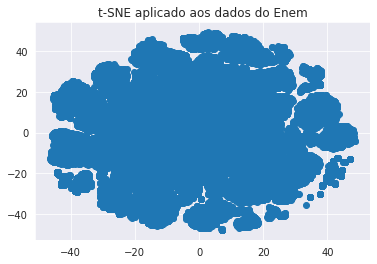

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
results_tsne = results.drop(["NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_REDACAO"], axis=1)
results_tsne = pd.concat([results_tsne, ml_results["NO_MUNICIPIO_RESIDENCIA"]], axis=1)

std_scaler = StandardScaler()

results_tsne = std_scaler.fit_transform(results_tsne)
tsne = TSNE()
transformed = tsne.fit_transform(results_tsne)
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(x=xs, y=ys)
plt.title("t-SNE aplicado aos dados do Enem")
plt.show()

In [0]:
tsne1 = TSNE()
transformed1 = tsne1.fit_transform(std_scaler.fit_transform(ml_results))
xs1 = transformed[:,0]
ys1 = transformed[:,1]

plt.figure(figsize=(10, 10))
plt.scatter(x=xs1, y=ys1)
plt.title("t-SNE aplicado aos dados do Enem com dados do machine learning")
plt.show()

In [0]:
results_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 92 columns):
NO_MUNICIPIO_RESIDENCIA        109399 non-null object
SG_UF_RESIDENCIA               109399 non-null object
NU_IDADE                       109399 non-null float64
TP_SEXO                        109399 non-null object
TP_ESTADO_CIVIL                109399 non-null float64
TP_COR_RACA                    109399 non-null int64
TP_NACIONALIDADE               109399 non-null int64
TP_ST_CONCLUSAO                109399 non-null int64
CO_MUNICIPIO_PROVA             109399 non-null int64
TP_ANO_CONCLUIU                109399 non-null int64
TP_ESCOLA                      109399 non-null int64
IN_TREINEIRO                   109399 non-null int64
NU_NOTA_CN                     109399 non-null float64
NU_NOTA_CH                     109399 non-null float64
NU_NOTA_LC                     109399 non-null float64
NU_NOTA_MT                     109399 non-null float64
NU_NOTA_R

Points generated by the t-SNE method.

In [0]:
tsne_points = pd.read_csv("My Drive/rn_enem_data_analysis/data/points_tsne01.csv", index_col="NU_INSCRICAO")
tsne_points.head()

,xs,ys,CN_NOTA
NU_INSCRICAO,,,
170003127880,-0.668720,45.749535,440.8
170006483595,-12.813740,-42.983063,549.9
170001415750,-40.966484,11.731860,406.0
170001417217,40.273407,16.252880,495.5
170006486473,-7.869942,9.532403,483.2


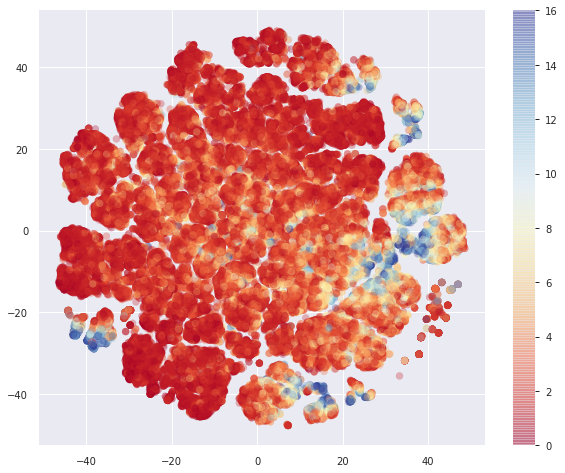

In [0]:
#df_plot = pd.DataFrame({'xs': tsne_points.xs, 'ys':tsne_points.ys, 'CN_NOTA': tsne_points.CN_NOTA})
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=export_df['Q006'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(sc)
plt.show()


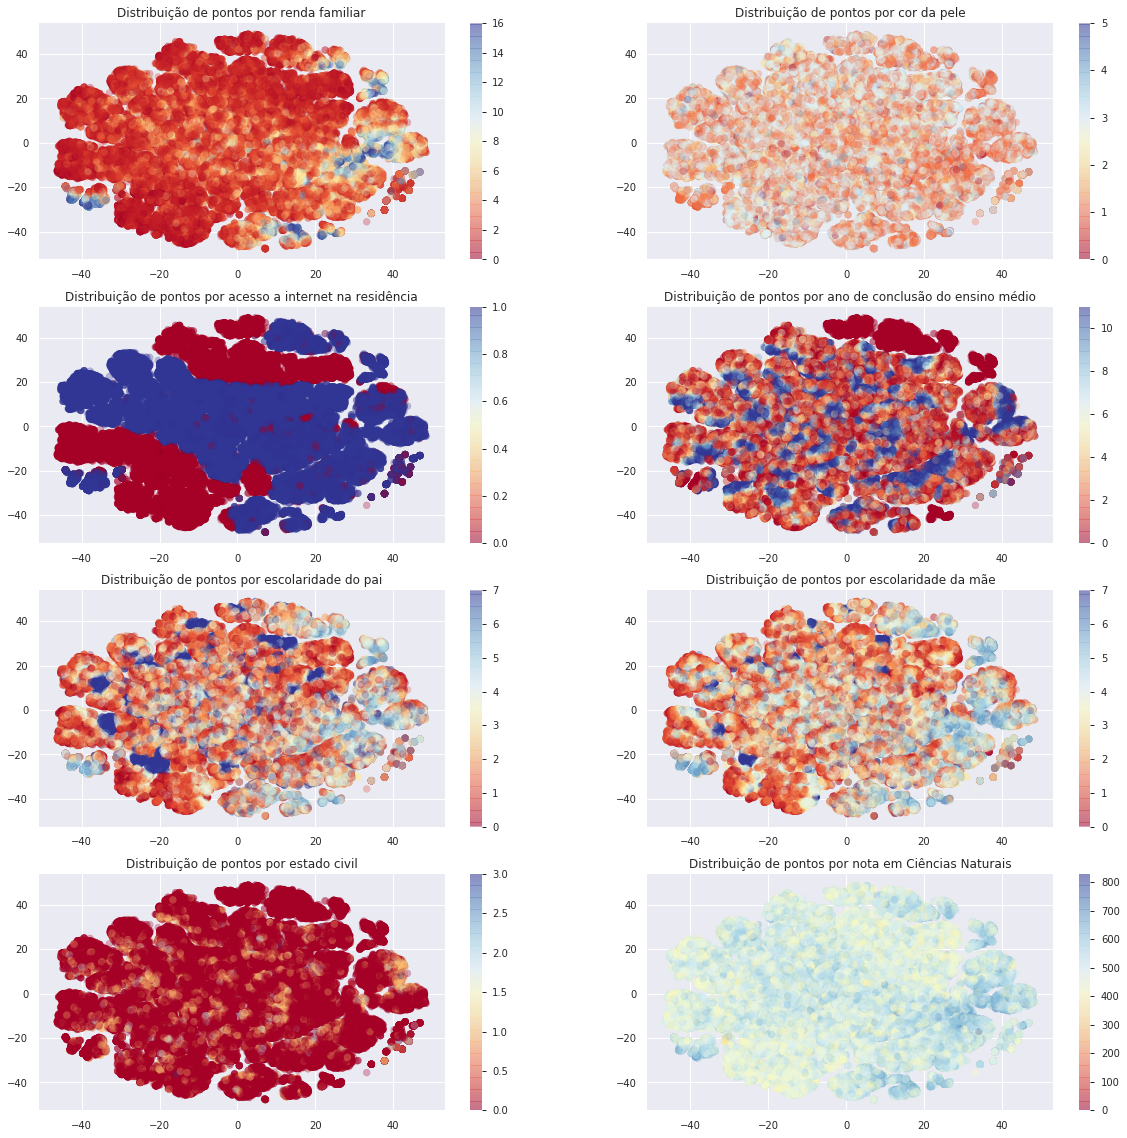

In [0]:

fig, ax = plt.subplots(4, 2)
cm = plt.cm.get_cmap('RdYlBu')
fig.set_figheight(20)
fig.set_figwidth(20)

fig1 = ax[0, 0].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=export_df['Q006'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig1, ax=ax[0,0])
ax[0, 0].set_title("Distribuição de pontos por renda familiar")
#fig1.title("Renda Familiar")

fig2 = ax[0,1].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=results_dropped['TP_COR_RACA'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig2, ax=ax[0,1])
ax[0, 1].set_title("Distribuição de pontos por cor da pele")

fig3 = ax[1,0].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=export_df['Q025'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig3, ax=ax[1,0])
ax[1, 0].set_title("Distribuição de pontos por acesso a internet na residência")

fig4 = ax[1,1].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=results_dropped['TP_ANO_CONCLUIU'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig4, ax=ax[1,1])
ax[1, 1].set_title("Distribuição de pontos por ano de conclusão do ensino médio")

fig5 = ax[2,0].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=export_df['Q001'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig5, ax=ax[2,0])
ax[2, 0].set_title("Distribuição de pontos por escolaridade do pai")

fig6 = ax[2,1].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=export_df['Q002'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig6, ax=ax[2,1])
ax[2, 1].set_title("Distribuição de pontos por escolaridade da mãe")

fig7 = ax[3,0].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=results_dropped['TP_ESTADO_CIVIL'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig7, ax=ax[3,0])
ax[3, 0].set_title("Distribuição de pontos por estado civil")

fig8 = ax[3,1].scatter(tsne_points['xs'], tsne_points['ys'], 
                 c=export_df['NU_NOTA_CN'], cmap=cm,
                 alpha=0.3,)
plt.colorbar(fig8, ax=ax[3,1])
ax[3, 1].set_title("Distribuição de pontos por nota em Ciências Naturais")
plt.show()

In [0]:
set(export_df['Q006'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [0]:
ax[0,0]

In [0]:
df_plot.to_csv("My Drive/rn_enem_data_analysis/data/points_tsne01.csv")

## 3.2 Exploratorya Data Analysis

Exploring how data behaves on the grades column based on the data set columns

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_style("darkgrid")
enem_supervised = pd.read_csv("My Drive/rn_enem_data_analysis/data/supervised_enem2017.csv", index_col="NU_INSCRICAO")


pais_prof_dict = {
    0: "Primário",
    1: "Terciário",
    2: "Secundário",
    3: "Liberal I",
    4: "Liberal II", 
    5: "Não Sabe"
}
enem_supervised["Prof_mae"] = df_adjusted["Q004"].map(pais_prof_dict)
enem_supervised["Prof_pai"] = df_adjusted["Q003"].map(pais_prof_dict)
esc_mae_dict = {
    0: "Nunca estudou",
    1: "EFI incompleto",
    2: "EFII incompleto",
    3: "EM incompleto",
    4: "EM completo",
    5: "ES completo",
    6: "Pós Completa",
    7: "Não Sabe"
}
enem_supervised["Escolaridade_mae"] = enem_supervised["Q002"].map(esc_mae_dict)
enem_supervised["Escolaridade_pai"] = enem_supervised["Q001"].map(esc_mae_dict)
enem_supervised["Q005"] = enem_supervised["Q005"].astype("int32")
my_order1 = enem_supervised.groupby(by=["Escolaridade_mae"])["NU_NOTA_CN"].median().sort_values(ascending=False).index

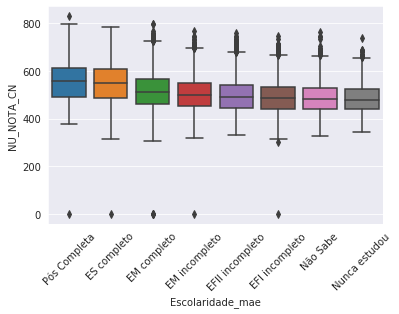

In [0]:
chart = sns.boxplot(x="Escolaridade_mae", y="NU_NOTA_CN", data=enem_supervised, order=my_order1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

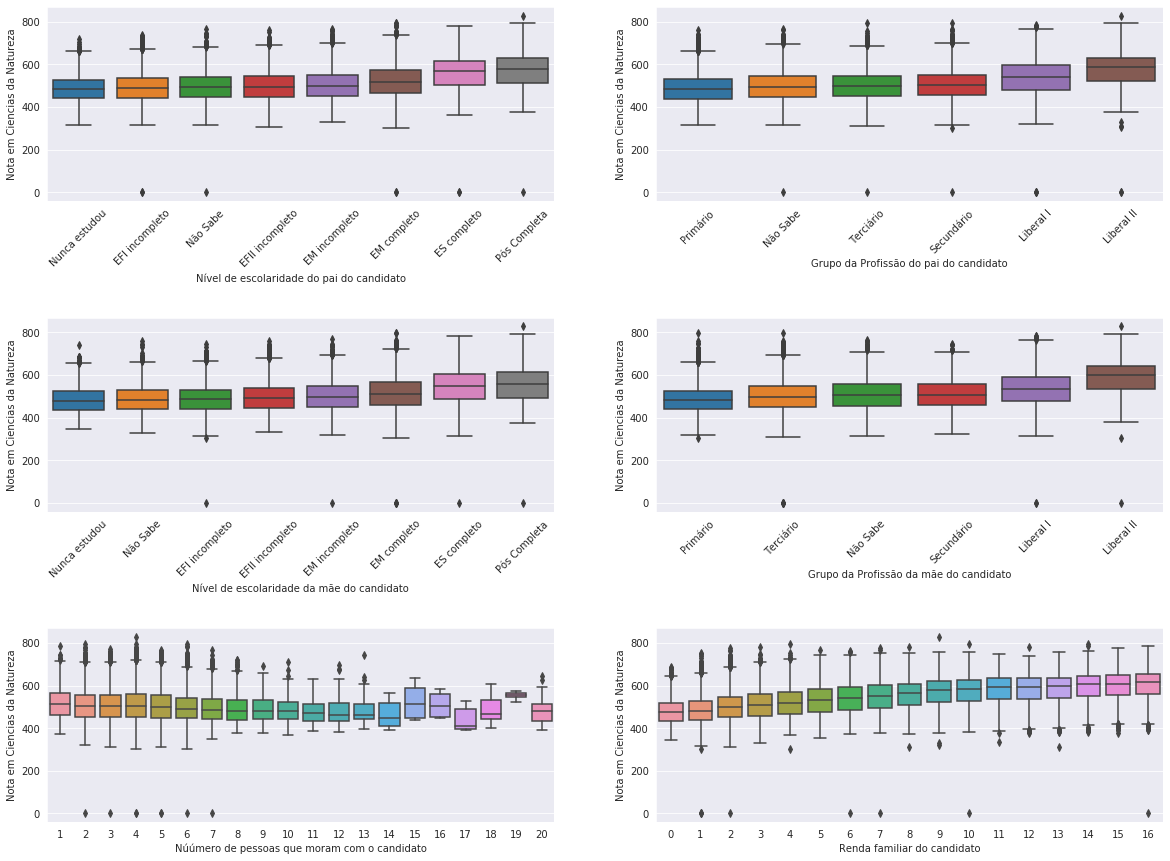

In [0]:
#Plots para dados familiares do candidato


#sns.boxplot(x="Escolaridade_mae", y="NU_NOTA_CN", data=enem_supervised, ax=ax[1][0])
fig, ax = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.subplots_adjust(hspace=0.6)

ordem_pai_escolaridade = enem_supervised.groupby(by=["Escolaridade_pai"])["NU_NOTA_CN"].median().sort_values().index
chart = sns.boxplot(x="Escolaridade_pai", y="NU_NOTA_CN", data=enem_supervised, ax=ax[0][0], order=ordem_pai_escolaridade)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel("Nível de escolaridade do pai do candidato")
chart.set_ylabel("Nota em Ciencias da Natureza")

ordem_pai_profissao = enem_supervised.groupby(by=["Prof_pai"])["NU_NOTA_CN"].median().sort_values().index
chart = sns.boxplot(x="Prof_pai", y="NU_NOTA_CN", data=enem_supervised, ax=ax[0][1], order=ordem_pai_profissao)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel("Grupo da Profissão do pai do candidato")
chart.set_ylabel("Nota em Ciencias da Natureza")

ordem_mae_escolaridade = enem_supervised.groupby(by=["Escolaridade_mae"])["NU_NOTA_CN"].median().sort_values().index
chart = sns.boxplot(x="Escolaridade_mae", y="NU_NOTA_CN", data=enem_supervised, ax=ax[1][0], order=ordem_mae_escolaridade)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel("Nível de escolaridade da mãe do candidato")
chart.set_ylabel("Nota em Ciencias da Natureza")

ordem_mae_profissao = enem_supervised.groupby(by=["Prof_mae"])["NU_NOTA_CN"].median().sort_values().index
chart = sns.boxplot(x="Prof_mae", y="NU_NOTA_CN", data=enem_supervised, ax=ax[1][1], order=ordem_mae_profissao)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel("Grupo da Profissão da mãe do candidato")
chart.set_ylabel("Nota em Ciencias da Natureza")

chart = sns.boxplot(x="Q005", y="NU_NOTA_CN", data=enem_supervised, ax=ax[2][0])
chart.set_xlabel("Núúmero de pessoas que moram com o candidato")
chart.set_ylabel("Nota em Ciencias da Natureza")

chart = sns.boxplot(x="Q006", y="NU_NOTA_CN", data=enem_supervised, ax=ax[2][1])
chart.set_xlabel("Renda familiar do candidato")
chart.set_ylabel("Nota em Ciencias da Natureza")
plt.show()

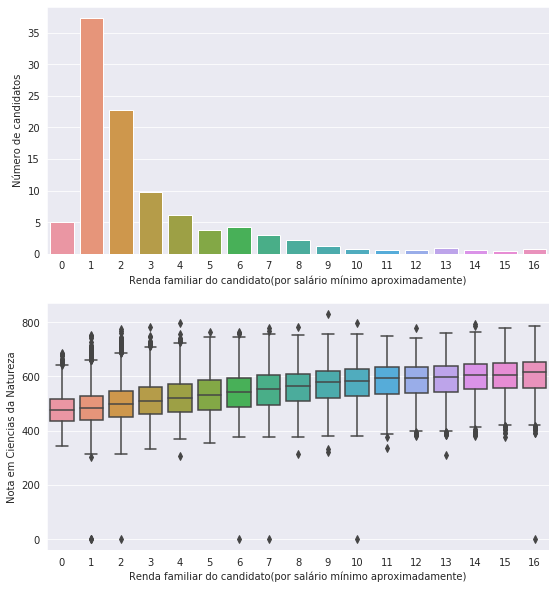

In [0]:
#Plots da renda do candidato

fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(9)

#enem_supervised["percentage_candidates"] = enem_supervised["Q006"].value_counts(normalize=True).sort_values("Q006")
#chart = sns.barplot(x="Q006", y="percentage_candidates", data=enem_supervised, ax=ax[0])
chart = sns.barplot(x="Q006", y="Q006", data=enem_supervised, estimator=lambda x: len(x) / len(enem_supervised) * 100, ax=ax[0])
chart.set_xlabel("Renda familiar do candidato(por salário mínimo aproximadamente)")
chart.set_ylabel("Número de candidatos")

chart = sns.boxplot(x="Q006", y="NU_NOTA_CN", data=enem_supervised, ax=ax[1])
chart.set_xlabel("Renda familiar do candidato(por salário mínimo aproximadamente)")
chart.set_ylabel("Nota em Ciencias da Natureza")
plt.show()

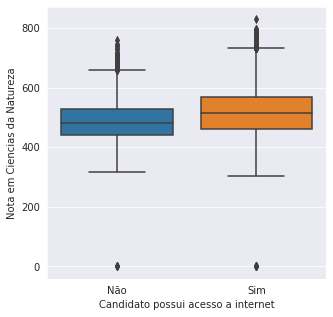

In [0]:
internet_dict = {
    0: "Não",
    1: "Sim"
}
enem_supervised["internet"] = enem_supervised["Q025"].map(internet_dict)
plt.figure(figsize=(5, 5))
chart = sns.boxplot(x="internet", y="NU_NOTA_CN", data=enem_supervised)
chart.set_xlabel("Candidato possui acesso a internet")
chart.set_ylabel("Nota em Ciencias da Natureza")
plt.show()

In [0]:
enem_supervised.columns.to_list()

['NO_MUNICIPIO_RESIDENCIA',
 'TP_SEXO',
 'Q001',
 'Q002',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'NU_IDADE',
 'TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_REDACAO',
 'Q005',
 'TP_ANO_CONCLUIU',
 'IN_TREINEIRO',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICAO',
 'IN_LIBRAS',
 'IN_LEITURA_LABIAL',
 'IN_MESA_CADEIRA_RODAS',
 'IN_MESA_CADEIRA_SEPARADA',
 'IN_APOIO_PERNA',
 'IN_CADEIRA_ACOLCHOADA',
 'IN_MOBILIARIO_OBESO',
 'IN_MEDIDOR_GLICOSE',
 'IN_MAQUINA_BRAI

# 4 Analysis

In [0]:
#Changing columns names
identifiable_column_names = {
    "Q001": "Escol_pai",
    "Q002": "Escol_mae",
    "Q005": "Pessoas_morando_junto",
    "Q006": "Renda_familia",
    "Q007": "Empreg_domestic",
    "Q008": "Banheiros",
    "Q009": "Quartos_dormir",
    "Q010": "Carros",
    "Q011": "Motos",
    "Q013": "Freezers",
    "Q014": "Maq_lavar_roupas",
    "Q015": "Maq_secar_roupas",
    "Q016": "Microondas",
    "Q017": "Maq_lavar_louça",
    "Q018": "Aspirador_po",
    "Q019": "TV_cores",
    "Q020": "DVDs",
    "Q021": "TV_assinatura",
    "Q022": "Tel_celular",
    "Q023": "Tel_fixo",
    "Q024": "Computadores",
    "Q025": "Internet_residencia",
    "prof_mae__0": "prof_mae_Primário",
    "prof_mae__1": "prof_mae_Terciário",
    "prof_mae__2": "prof_mae_Secundário",
    "prof_mae__3": "prof_mae_LiberalI",
    "prof_mae__4": "prof_mae_LiberalII", 
    "prof_mae__5": "prof_mae_Não Sabe",
    "prof_pai__0": "prof_pai_Primário",
    "prof_pai__1": "prof_pai_Terciário",
    "prof_pai__2": "prof_pai_Secundário",
    "prof_pai__3": "prof_pai_Liberal_I",
    "prof_pai__4": "prof_pai_Liberal_II", 
    "prof_pai__5": "prof_pai_NãoSabe",
    'tipo_ens_medio__1': "tipo_ens_medio_NaoRespondeu",
    'tipo_ens_medio__2': "tipo_ens_medio_Publica",
    'tipo_ens_medio__3': "tipo_ens_medio_Privada",
    'tipo_ens_medio__4': "tipo_ens_medio_Exterior",
}
#enem_supervised.rename(columns=identifiable_column_names, inplace=True)
#enem_supervised.columns.to_list()

## 4.1 Model Creation

In this part, we will use some models to try to predict student grades. Later, we will create a pipeline to try to find the best conditions in which we can evaluate a model, and then use this to try to find the most relevant features in each model.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, RFE, chi2
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



enem_supervised = pd.read_csv("My Drive/rn_enem_data_analysis/data/supervised_enem2017.csv", index_col="NU_INSCRICAO")
std = StandardScaler()

enem_supervised["Municipio_média"] = enem_supervised["NO_MUNICIPIO_RESIDENCIA"].values.reshape(-1, 1)
#enem_supervised["NU_IDADE"] = std.fit_transform(enem_supervised["NU_IDADE"].values.reshape(-1, 1))
#enem_supervised["Q005"] = std.fit_transform(enem_supervised["Q005"].values.reshape(-1, 1))
#enem_supervised["Municipio_média"] = le.fit_transform(enem_supervised["Municipio_média"])
enem_supervised.rename(columns=identifiable_column_names, inplace=True)
X = enem_supervised.drop(['NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', "NO_MUNICIPIO_RESIDENCIA"], axis=1)

y = enem_supervised['NU_NOTA_CN']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, shuffle=True)
print(X_train.info(verbose=2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82049 entries, 170001989364 to 170002898603
Data columns (total 101 columns):
TP_SEXO                           int64
Escol_pai                         int64
Escol_mae                         int64
Renda_familia                     int64
Empreg_domestic                   int64
Banheiros                         int64
Quartos_dormir                    int64
Carros                            int64
Motos                             int64
Freezers                          int64
Maq_lavar_roupas                  int64
Maq_secar_roupas                  int64
Microondas                        int64
Maq_lavar_louça                   int64
Aspirador_po                      int64
TV_cores                          int64
DVDs                              int64
TV_assinatura                     int64
Tel_celular                       int64
Tel_fixo                          int64
Computadores                      int64
Internet_residencia             

In [0]:
#y.hist(bins=25)
X.head()

,TP_SEXO,Escol_pai,Escol_mae,Renda_familia,Empreg_domestic,Banheiros,Quartos_dormir,Carros,Motos,Freezers,Maq_lavar_roupas,Maq_secar_roupas,Microondas,Maq_lavar_louça,Aspirador_po,TV_cores,DVDs,TV_assinatura,Tel_celular,Tel_fixo,Computadores,Internet_residencia,NU_IDADE,TP_DEPENDENCIA_ADM_ESC,Pessoas_morando_junto,TP_ANO_CONCLUIU,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,...,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_NOME_SOCIAL,prof_mae_Primário,prof_mae_Terciário,prof_mae_Secundário,prof_mae_LiberalI,prof_mae_LiberalII,prof_mae_Não Sabe,prof_pai_Primário,prof_pai_Terciário,prof_pai_Secundário,prof_pai_Liberal_I,prof_pai_Liberal_II,prof_pai_NãoSabe,situ_conc__0,situ_conc__1,situ_conc__2,situ_conc__3,tipo_ens_medio_NaoRespondeu,tipo_ens_medio_Publica,tipo_ens_medio_Privada,tipo_ens_medio_Exterior,cor_raca__Amarelo,cor_raca__Branco,cor_raca__Indígena,cor_raca__Negro,cor_raca__Não declarado,cor_raca__Pardo,nacionalidade__BR_nascido_ext,nacionalidade__BR_naturalizado,nacionalidade__Brasileiro,nacionalidade__Estrangeiro,nacionalidade__Não declarado,tipo_escola_Exterior,tipo_escola_Não Respondeu,tipo_escola_Privada,tipo_escola_Pública,Municipio_média
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,0,7,7,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,17.0,-5.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,480.238172
170006483595,0,3,2,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,22.0,-5.0,3.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,491.996229
170001415750,0,1,2,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,26.0,-5.0,2.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,492.675049
170001417217,1,3,4,5,0,1,3,1,0,0,1,0,1,0,1,1,1,0,2,0,1,0,39.0,-5.0,2.0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,523.340580
170006486473,1,3,6,4,0,1,2,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,21.0,-5.0,3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,507.042069


In [0]:
xgb_clf = xgb.XGBRegressor(n_estimators=500, tree_method="hist", n_jobs=-1)
xgb_clf.fit(X_train, y_train)
print(f"Training score is: {xgb_clf.score(X_train, y_train)}")
print(f"Testing score is: {xgb_clf.score(X_test, y_test)}")

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score is: 0.270310961068871
Testing score is: 0.25816820887812486


In [0]:
from sklearn.metrics import mean_squared_error as MSE
y_train_pred = xgb_clf.predict(X_train)
print(f"Training score is: {np.sqrt(MSE(y_train, y_train_pred))}")
y_pred = xgb_clf.predict(X_test)
print(f"Testing score is: {np.sqrt(MSE(y_test, y_pred))}")


Training score is: 59.85827546431238
Testing score is: 60.557814687673115


## 4.2 Feature Analyisis on the features of the model

In this section, we are going to use different methods of feature analysis in order to explore how features impact on the prediction model of the student's grade, so we can explore the reasons to why the candidate performed that way.

### 4.2.1 XGB feature importances



Text(0.5, 1.0, 'Feature Importance - Sample Coverage')

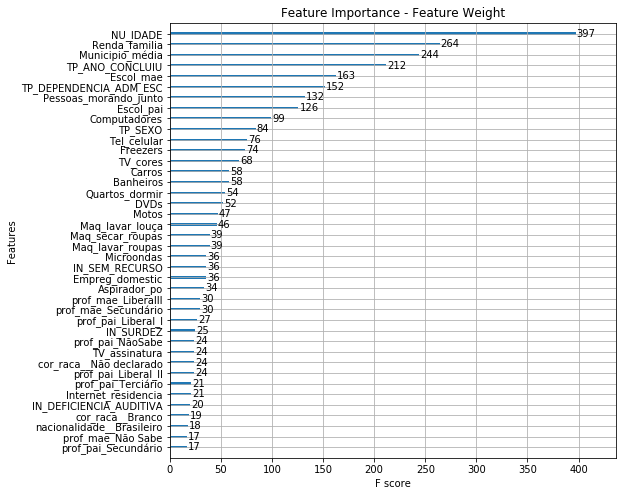

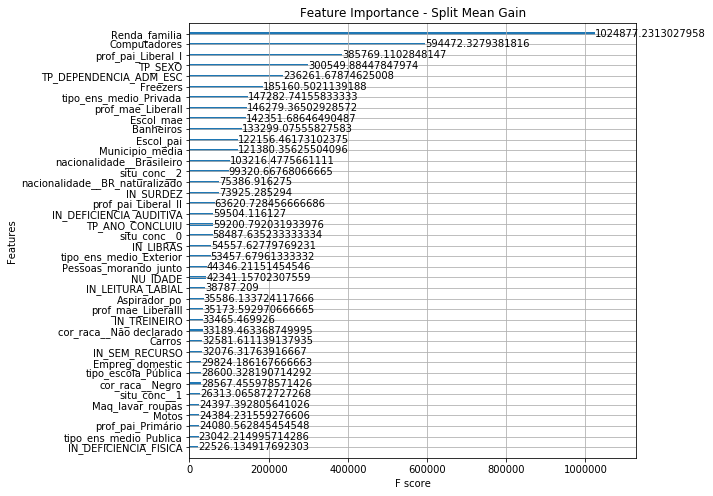

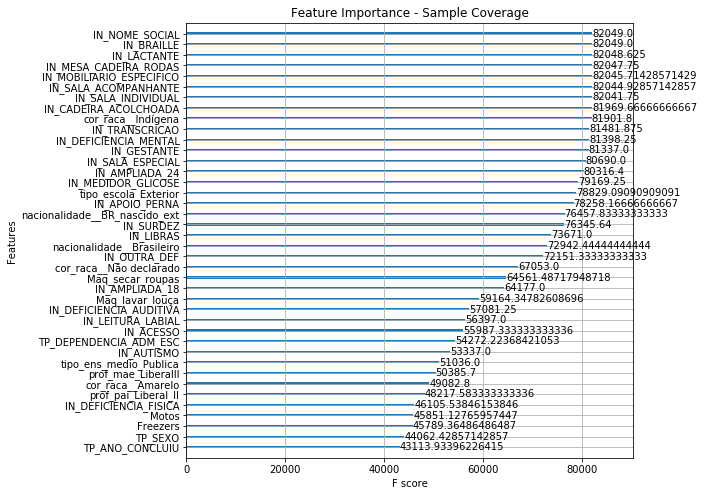

In [0]:
#fig = plt.figure(figsize = (15, 50))
#plt.suptitle("Resultado das Simlações feitas no PIPE", x=0.5, y=0.9, fontsize=16)
fig_height = 8
fig_width = 8
max_features = 40
ax = xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=max_features)
ax.figure.set_figheight(fig_height)
ax.figure.set_figwidth(fig_width)
ax.set_title("Feature Importance - Feature Weight")

#ax2 = fig.add_subplot(3,1, 2)
ax = xgb.plot_importance(xgb_clf, importance_type='gain', max_num_features=max_features)
ax.figure.set_figheight(fig_height)
ax.figure.set_figwidth(fig_width)
ax.set_title("Feature Importance - Split Mean Gain")

#ax3 = fig.add_subplot(3,1, 3)
ax = xgb.plot_importance(xgb_clf, importance_type='cover', max_num_features=max_features)
ax.figure.set_figheight(fig_height)
ax.figure.set_figwidth(fig_width)
ax.set_title("Feature Importance - Sample Coverage")

In [0]:
!pip install -U eli5

     |████████████████████████████████| 112kB 3.5MB/s 


### 4.2.2 Eli5

In [0]:
import eli5
np.random.seed(42)
sample = np.random.randint(0, y_test.shape[0])
labels = enem_supervised.columns.to_list()
print(f"Actual value: {y_test.iloc[sample]}")
print(f"Predicted value of the grade: {y_pred[sample]}")
eli5.show_prediction(xgb_clf.get_booster(), X_test.iloc[sample], 
                     show_feature_values=True, top=30)


Using TensorFlow backend.


Actual value: 384.5
Predicted value of the grade: 511.4714050292969


In [0]:
sample = np.random.randint(0, y_test.shape[0])
labels = enem_supervised.columns.to_list()
print(f"Actual value: {y_test.iloc[sample]}")
print(f"Predicted value of the grade: {y_pred[sample]}")
eli5.show_prediction(xgb_clf.get_booster(), X_test.iloc[sample], 
                     show_feature_values=True, top=30)

Actual value: 459.2
Predicted value of the grade: 472.3198547363281


In [0]:
condition = y_test > 750.0
sample_grade = y_test[condition]
sample_test = X_test[condition]
sample_num = 8
sample = sample_test.iloc[sample_num]
sample_inscricao = sample_test.iloc[sample_num].name
df = pd.DataFrame({"y_pred": y_pred, "inscricao": y_test.index.to_list()})
row_index = df[df["inscricao"] == sample_inscricao]
labels = X_train.columns.to_list()

print(f"Actual value: {sample_grade.iloc[sample_num]}")
print(f"Predicted value of the grade: {xgb_clf.predict(sample_test.iloc[sample_num:sample_num+1])[0]}")
eli5.show_prediction(xgb_clf.get_booster(), sample_test.iloc[sample_num:sample_num+1], 
                     show_feature_values=True, top=31,
                     feature_names=labels)

### 4.2.3 SHAP Values
We will label encode the cities in this subsection, and then later we will try to reduce cardinality on the residency city reducing to the 4 regions of Rio Grande do Norte.

In [0]:
!pip install -U shap

     |████████████████████████████████| 266kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376831 sha256=bb66031b7d627d0a0fa6ec4a527ea02bc6a5cf26afa18e4e2669c663eb1a2701
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [0]:
import shap

shap_values = shap.TreeExplainer(xgb_clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

AssertionError: ignored

## 4.2 Creating Pipeline

We will use sklearn package pipeline and tpot package to create pipelines to find the best model.

In [0]:
from sklearn.feature_selection import chi2, SelectKBest, RFE, f_regression

skb = SelectKBest(f_regression, k="all")
selectedNew = skb.fit_transform(X, y)
mask = skb.get_support()
params = skb.get_params()
scores = skb.scores_
selectedNew.shape

In [0]:
features_df = pd.DataFrame(selectedNew, columns=pd.Series(X.columns)[mask])
features_df.head()

,TP_SEXO,Q001,Q002,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_IDADE,TP_DEPENDENCIA_ADM_ESC,Q005,TP_ANO_CONCLUIU,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,...,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_NOME_SOCIAL,prof_mae__0,prof_mae__1,prof_mae__2,prof_mae__3,prof_mae__4,prof_mae__5,prof_pai__0,prof_pai__1,prof_pai__2,prof_pai__3,prof_pai__4,prof_pai__5,situ_conc__0,situ_conc__1,situ_conc__2,situ_conc__3,tipo_ens_medio__1,tipo_ens_medio__2,tipo_ens_medio__3,tipo_ens_medio__4,cor_raca__Amarelo,cor_raca__Branco,cor_raca__Indígena,cor_raca__Negro,cor_raca__Não declarado,cor_raca__Pardo,nacionalidade__BR_nascido_ext,nacionalidade__BR_naturalizado,nacionalidade__Brasileiro,nacionalidade__Estrangeiro,nacionalidade__Não declarado,tipo_escola_Exterior,tipo_escola_Não Respondeu,tipo_escola_Privada,tipo_escola_Pública,Municipio_média
0,0.0,7.0,7.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.834991,-5.0,-0.646354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.731099
1,0.0,3.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.169851,-5.0,-0.646354,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.969663
2,0.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.362262,-5.0,-1.296487,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.925704
3,1.0,3.0,4.0,5.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.091626,-5.0,-1.296487,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.060153
4,1.0,3.0,6.0,4.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,-0.302879,-5.0,-0.646354,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004684


In [0]:
scores_df = pd.DataFrame(data=scores, index=pd.Series(X.columns))
scores_df.sort_values(by=0,ascending=False).head(50)

,0
Q006,19544.703533
Q024,13679.833810
Q008,10176.554411
Q010,9934.638862
Q019,6991.988366
Q002,5793.707593
Municipio_média,5613.731727
Q021,5336.700241
Q022,5272.987833
Q013,5209.078769


In [0]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import timeit

def rmse(y, y_pred):
  return np.sqrt(MSE(y, y_pred))
rmse_scoring = make_scorer(rmse)
number_splits_cv = 5
kf = KFold(n_splits=number_splits_cv, shuffle=True, random_state=42)

pipeline = Pipeline(steps=[
                           ("feature_selector", SelectKBest(f_regression)),
                           ("regressor", xgb.XGBRegressor(tree_method="gpu_hist"))
])

search_space = [
                {
                 "feature_selector__k": [40, 50, 60, 70, 80, 90, "all"],
                 "regressor__n_estimators": [400, 500, 600, 700],
                 "regressor__learning_rate": [0.01, 0.1, 0.5],
                 "regressor__max_depth": [2, 3, 4, 5],
                 "regressor__booster": ["gbtree", "gblinear", "dart"]   
                }]
grid = GridSearchCV(estimator=pipeline, param_grid=search_space, cv=kf, scoring=rmse_scoring, return_train_score=True, n_jobs=-1, verbose=2)


In [0]:
best_model = grid.fit(X_train, y_train)
print("Best: %f using %s" % (best_model.best_score_,best_model.best_params_))
result = pd.DataFrame(best_model.cv_results_)
result.to_csv("My Drive/rn_enem_data_analysis/data/results_grid_search.csv")

import pickle as pkl
with open('My Drive/MachineLearning/Lesson#08/pipe_final.pkl', 'wb') as file:
  pkl.dump(best_model.best_estimator_, file)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.0s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 425.8min
